# Implementing K-means Clustering and finding the right value for K
* We'll use the Iris dataset
* We'll implement the so-called "Elbow" method to determine the right value for 'k'

# Step 1: Importing the data


In [7]:
from sklearn import datasets
iris = datasets.load_iris()
import numpy as np
import matplotlib.pyplot as plt
# All rows, only the last two columns(features)
X = iris.data
y = iris.target

# Defining our list of possible k values from 1 to 8 
k_list = list(range(1, 9))
sse_list = [0] * len(k_list)

# Step 2: Preparing the model
* We'll use the whole feature space and k ranges from 1 to 8
* We'll train individual models and record the resulting SSE respectively

In [9]:
from sklearn.cluster import KMeans

# Iterate through the list of K values. 
for k_index, k in enumerate(k_list):
    # Initialize the KMeans model. n_clusters is the number of clusters to form and the number of centroids to generate.
    k_means = KMeans(n_clusters = k, random_state = 42, n_init = 'auto')
    
    # Fit the KMeans model to our data
    k_means.fit(X)
    
    # Get the cluster labels for each data point
    clusters = k_means.labels_
    # Get the coordinates of the cluster centers
    centroids = k_means.cluster_centers_
    
    # Initialize the SSE (sum of squared errors) 
    sse = 0
    
    # For each cluster
    for i in range(k):
        # Get the points in this cluster
        cluster_i = np.where(clusters == i)
        
        # Calculate the distance of all points in this cluster to the centroid, square it, and add it to the SSE
        sse += np.linalg.norm(X[cluster_i] - centroids[i])
        
    # Print the SSE for this K value
    print(f"k = {k}, SSE= {sse}")
    
    # Store the SSE for this K value in our list of SSEs (We'll plot it later)
    sse_list[k_index] = sse
    
    

k = 1, SSE= 26.103076447039722
k = 2, SSE= 16.469773740281195
k = 3, SSE= 15.12160093100892
k = 4, SSE= 15.05769253182257
k = 5, SSE= 14.858930749063735
k = 6, SSE= 14.883090350867239
k = 7, SSE= 14.623462334402264
k = 8, SSE= 15.860429276025512


# Step 3: Visualizing the curve
* We'll get an idea of how the SSE changes with the values of k

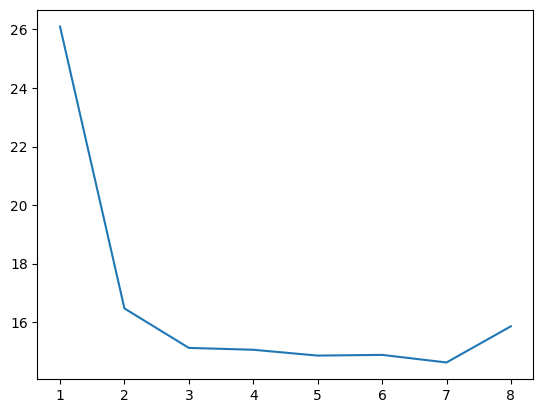

In [10]:
plt.plot(k_list, sse_list)
plt.show()

Apparently, the Elbow point is k=3, since the drop in SSE slows down dramatically right after 3. Hence, k=3is an optimal solution in this case.